## Project 2
## NYC Juvenile and Adult Case Closings(2017-2023)

In this project, we explore data from the *NYC Department of Probation*, focusing on trends in case closings for juveniles and adults between 2017 and 2023. The hypothesis being tested is whether systematic probation policies have led to similar trends for juveniles and adults over this period.

We will analyze trends for:  
**Early Discharge** (for both adults and juveniles).  
**Probation-related** closures: Violation of Probation (adults) and Probation Revoked (juveniles).

Key questions we are addressing:  
How do trends in Early Discharge compare between juveniles and adults?  
Are probation-related closures following similar patterns across these groups?

More specific data info can be found here:  
https://data.cityofnewyork.us/Public-Safety/DOP-Adult-Case-Closings-By-Reason/u6p4-fsey/about_data  
https://data.cityofnewyork.us/Public-Safety/DOP-Juvenile-Case-Closings-By-Reason/wha7-46h5/about_data


### Step 1: Load and Inspect Data

In [2]:
import pandas as pd

#Load datasets
adult_cases = pd.read_csv("DOP_Adult_Case_Closings_By_Reason_20241124.csv")
juvenile_cases = pd.read_csv("DOP_Juvenile_Case_Closings_By_Reason_20241124.csv")

#Display the first few rows to understand the data structure
adult_cases.head(), juvenile_cases.head()

(     Region Supervision Closing Reason   Month  Year  \
 0  Citywide                      Death  August  2021   
 1  Citywide    Maximum Expiration Date  August  2021   
 2  Citywide                      Other  August  2021   
 3  Citywide     Violation of Probation  August  2021   
 4  Citywide            Early Discharge  August  2021   
 
    Supervision Closing Count  
 0                          1  
 1                        239  
 2                         54  
 3                         30  
 4                         49  ,
      Region Supervision Closing Reason      Month  Year  \
 0  Citywide    Maximum Expiration Date  September  2016   
 1  Citywide            Early Discharge  September  2016   
 2  Citywide          Probation Revoked  September  2016   
 3  Citywide                      Other  September  2016   
 4  Citywide          Probation Revoked   November  2016   
 
    Supervision Closing Count  
 0                         81  
 1                          4  
 2   

### Step 2: Filter the Data

We filter the data to include only the data from 2017 to 2023, and the case closing reasons we choose to look at are Early Discharge for both adult and juvenile cases and Violation of Probation (adults) and Probation Revoked(juveniles).

In [3]:
# Filter the relevant years and case closing reasons
years = range(2017, 2024)
adult_cases = adult_cases[
    (adult_cases['Year'].isin(years)) &
    (adult_cases['Supervision Closing Reason'].isin(['Early Discharge', 'Violation of Probation']))
]
juvenile_cases = juvenile_cases[
    (juvenile_cases['Year'].isin(years)) &
    (juvenile_cases['Supervision Closing Reason'].isin(['Early Discharge', 'Probation Revoked']))
]

# Check the cleaned data
adult_cases.head(), juvenile_cases.head()

(      Region Supervision Closing Reason      Month  Year  \
 3   Citywide     Violation of Probation     August  2021   
 4   Citywide            Early Discharge     August  2021   
 6   Citywide            Early Discharge  September  2021   
 8   Citywide     Violation of Probation  September  2021   
 11  Citywide     Violation of Probation   November  2021   
 
     Supervision Closing Count  
 3                          30  
 4                          49  
 6                          50  
 8                          27  
 11                         32  ,
       Region Supervision Closing Reason     Month  Year  \
 12  Citywide          Probation Revoked   January  2017   
 13  Citywide            Early Discharge   January  2017   
 16  Citywide          Probation Revoked  February  2017   
 17  Citywide            Early Discharge  February  2017   
 20  Citywide          Probation Revoked     March  2017   
 
     Supervision Closing Count  
 12                         22  
 13  

### Step 3: Group the Data by Year and Reason

In [4]:
# Group by year and reason, summing the counts
adult_grouped = adult_cases.groupby(['Year', 'Supervision Closing Reason'])['Supervision Closing Count'].sum().reset_index()
juvenile_grouped = juvenile_cases.groupby(['Year', 'Supervision Closing Reason'])['Supervision Closing Count'].sum().reset_index()

# Pivot tables for visualization purposes 
adult_pivot = adult_grouped.pivot(index='Year', columns='Supervision Closing Reason', values='Supervision Closing Count').fillna(0)
juvenile_pivot = juvenile_grouped.pivot(index='Year', columns='Supervision Closing Reason', values='Supervision Closing Count').fillna(0)

adult_pivot, juvenile_pivot

(Supervision Closing Reason  Early Discharge  Violation of Probation
 Year                                                               
 2017                                    675                    1177
 2018                                    700                    1218
 2019                                   1044                    1048
 2020                                    880                     396
 2021                                    659                     344
 2022                                    649                     563
 2023                                    974                     649,
 Supervision Closing Reason  Early Discharge  Probation Revoked
 Year                                                          
 2017                                     25                239
 2018                                     31                217
 2019                                     23                140
 2020                                     11              

### Step 4: Visualizing Trends in Early Discharge

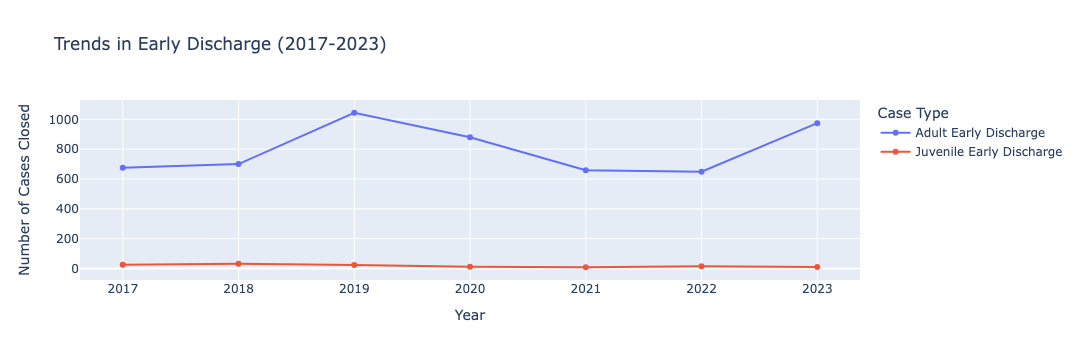

In [5]:
import plotly.express as px
import plotly.io as pio 

pio.renderers.default = "vscode+jupyterlab+notebook_connected" 

# Early Discharge trends for adult and juvenile cases 
early_discharge = adult_pivot[['Early Discharge']].rename(columns={'Early Discharge': 'Adult Early Discharge'}).reset_index()
early_discharge['Juvenile Early Discharge'] = juvenile_pivot['Early Discharge'].values 

fig = px.line(
    early_discharge,
    x='Year',
    y=['Adult Early Discharge', 'Juvenile Early Discharge'],
    markers=True,
    title="Trends in Early Discharge (2017-2023)",
    labels={'value': 'Number of Cases Closed', 'Year':'Year'}
)
fig.update_layout(
    legend_title_text='Case Type',
    xaxis_title='Year',
    yaxis_title='Number of Cases Closed',
    yaxis=dict(tickmode='linear',tick0=0,dtick=200) # Set tick interval on y-axis to 200
)
fig.show()

**Observations**:  
- Adults: A significant increase in Early Discharges from 2017 to 2019, followed by a drop in 2020 and 2021, possibly due to the COVID-19 pandemic. Numbers recovered slightly in 2023.
- Juveniles: A consistent decline from 2017 to 2021, with a small rise in 2022 before dipping again in 2023. Early Discharges for juveniles are far lower than for adults across all years.


### Step 5: Visualize Trends in Probation-Related Closings

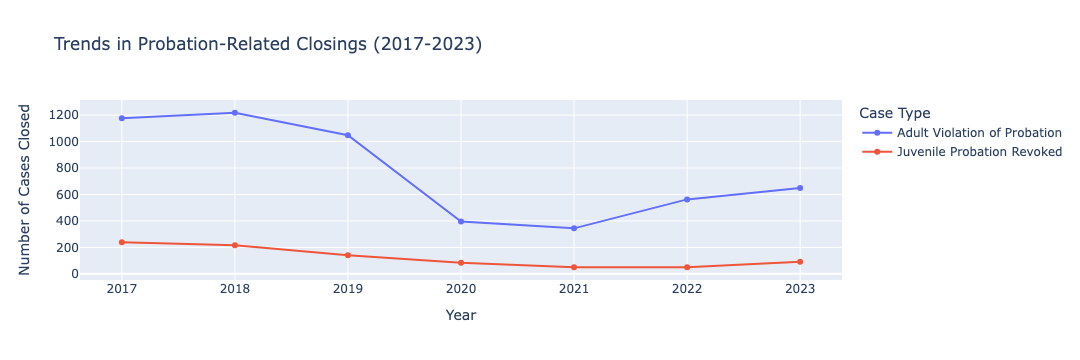

In [6]:
# Probation-related trends for adults and juveniles
probation_related = adult_pivot[['Violation of Probation']].rename(columns={'Violation of Probation': 'Adult Violation of Probation'}).reset_index()
probation_related['Juvenile Probation Revoked'] = juvenile_pivot['Probation Revoked'].values

fig = px.line(
    probation_related,
    x='Year',
    y=['Adult Violation of Probation', 'Juvenile Probation Revoked'],
    markers=True,
    title="Trends in Probation-Related Closings (2017-2023)",
    labels={'value': 'Number of Cases Closed', 'Year': 'Year'}
)
fig.update_layout(
    legend_title_text='Case Type',
    xaxis_title='Year',
    yaxis_title='Number of Cases Closed',
    yaxis=dict(tickmode='linear', tick0=0, dtick=200) 
)
fig.show()

**Observations:**  
- Adults: A steady decrease in violations from 2017 to 2020, followed by a recovery in 2022 and 2023.
The trend may reflect shifts in enforcement or changes in supervision practices during and after the pandemic.
- Juveniles: A sharper decline in probation revocations from 2017 to 2021. A modest recovery in 2023, but the overall numbers are far lower than for adults.

### Step 6: Compare All Trends in A Single Visualization 

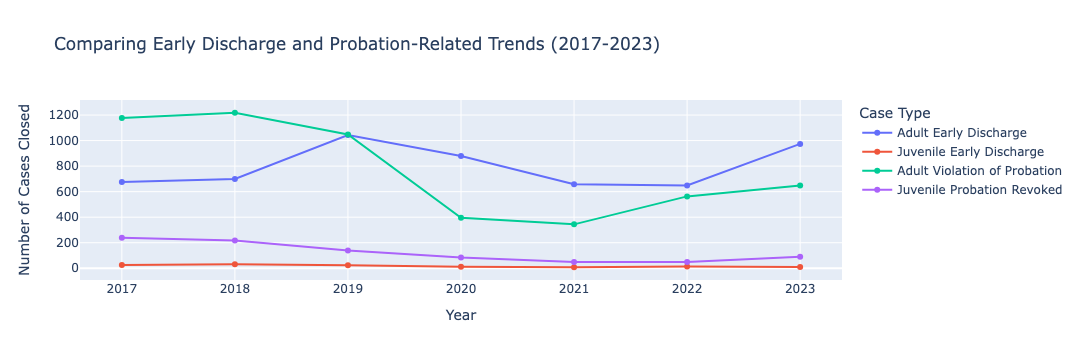

In [7]:
# Combine all adult and juvenile trends for both Early Discharge and Probation-related closings
combined_data = adult_pivot[['Early Discharge', 'Violation of Probation']].rename(
    columns={'Early Discharge': 'Adult Early Discharge', 'Violation of Probation': 'Adult Violation of Probation'}
).reset_index()
combined_data['Juvenile Early Discharge'] = juvenile_pivot['Early Discharge'].values
combined_data['Juvenile Probation Revoked'] = juvenile_pivot['Probation Revoked'].values

fig = px.line(
    combined_data,
    x='Year',
    y=['Adult Early Discharge', 'Juvenile Early Discharge', 'Adult Violation of Probation', 'Juvenile Probation Revoked'],
    markers=True,
    title="Comparing Early Discharge and Probation-Related Trends (2017-2023)",
    labels={'value': 'Number of Cases Closed', 'Year': 'Year'}
)
fig.update_layout(
    legend_title_text='Case Type',
    xaxis_title='Year',
    yaxis_title='Number of Cases Closed',
    yaxis=dict(tickmode='linear', tick0=0, dtick=200)
)
fig.show()

### Summary
**Observations:**  
1)Early Discharge:  
- Adults show a substantial increase in Early Discharges from 2017 to 2019, contrasting with a steady decline for juveniles.
- This suggests different policies or practices influencing Early Discharge decisions for these groups.
  
2)Probation-Related Closings:  
- Both adults (Violation of Probation) and juveniles (Probation Revoked) exhibit a decline from 2017 to 2020, followed by some recovery in 2023.
- Juvenile numbers are consistently much lower, reflecting differences in enforcement or probation structures.
  
3)Cross-Group Similarities:  
- Both groups experienced notable declines in case closings during 2020 and 2021, likely due to pandemic disruptions.
Recovery trends from 2022 onwards are similar, though they differ in magnitude between adults and juveniles.

**Key Takeaways**:  
The trends reflect potential systematic impacts of NYC probation policies, external factors (e.g., COVID-19), and differing practices for adults and juveniles. Early Discharge appears more frequent for adults, suggesting a policy shift toward rehabilitation for this group. Probation-related closures, though declining for both groups, highlight stricter monitoring for adults. While similar cross-group shifts started in 2020 could be attributed to COVID, it is also worth further exploration of how a new US president and the new administration could be influencing the overall probation policies and practices in the country. 
